In [20]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

import evosax

from typing import NamedTuple
from functools import partial
import math

In [22]:
import xylo
import xylo.types as t
import xylo.woods
import xylo.cut

import xylo.receptance as r
import xylo.sweep as xs

import xylo.loss.receptance as xlr

import xylo.tuning
import xylo.database as db

In [23]:
def sweep_blank(wood, bar):
    sections = xylo.cut.none(bar)
    # sections.plot(to_scale = True)
    swp = xs.sweep(wood, bar, sections, t.sweep_default)
    print(wood)
    print(swp.harmonics)
    print(swp.harmonics / swp.harmonics[0])
    print("")

In [43]:
# def make_bar(note, tuning = xylo.tuning.yamaha_YX500R, width = 0.040, depth = 0.019, elements = 1):
#   length = tuning.note_to_length(note)
#   return t.BarProps(width = width, depth = depth, length = length, elements = elements, min_depth = 0.010)

def make_bar(note):
  return db.get().get_geometry(note).to_bar()

def make_bar_wood(note, base, coeffs):
  d = db.get()
  bar = d.get_geometry(note).to_bar()
  bar = bar._replace(elements = 1)
  wood = d.get_wood(note, base, coeffs) # , base, coeffs)
  return bar, wood


In [137]:
for note in [80]: # list(range(45,57)) + [75, 77, 80]:
# for note in [75,80]:
# for note in range(57,89):
# for note in [85]: #, 72, 75, 77, 78, 80, 83, 85]:
  print(note)
  b,w = make_bar_wood(note, t.Wood.make_E_nu(E = 24.1e9, nu = 6.5, rho = 1059), coeffs = [1.0, 1.0, 1.0])
  # print(b,w)
  sweep_blank(w, b)
  print()

80
Wood(rho=1070.185630027113, E=24100000000.0, G=1606666666.6666667, nu=6.5)
[2645.43561958 5936.30445378 9489.68951811]
[1.         2.24397994 3.58719352]




In [27]:
sweep_blank(t.Wood.make_E_nu(E = 29.100e9, nu = 0.49, rho = 1059), bar300)
sweep_blank(xylo.woods.spotted_gum, bar300)
sweep_blank(xylo.woods.aluminium, bar300)
sweep_blank(xylo.woods.mingming, bar300)
sweep_blank(xylo.woods.rosewood, bar300)
sweep_blank(xylo.woods.suits_oak, bar300)
sweep_blank(xylo.woods.tasmanian_oak, bar300)
sweep_blank(xylo.woods.wood_test_chaigne1997, bar300)

# xsweep(t.Wood.make_E_nu(E = 26.100e9, nu = 0.49, rho = 990))
# xsweep(t.Wood.make_E_nu(E = 26.100e9, nu = 0.49, rho = 1114))
# xsweep(t.Wood.make_E_nu(E = 23.150e9, nu = 0.49, rho = 990))
# xsweep(t.Wood.make_E_nu(E = 26.100e9, nu = 12.7, rho = 990))
# xsweep(t.Wood.make_E_nu(E = 24.500e9, nu = 6.9, rho = 990))
# xsweep19(t.Wood.make_E_nu(E = 26.100e9, nu = 0.49, rho = 1059), d = 0.0195, w = 0.040)
# xsweep19(t.Wood.make_E_nu(E = 26.100e9, nu = 0.49, rho = 1059), d = 0.0192, w = 0.038, l = 0.300)
# xsweep19(t.Wood.make_E_nu(E = 28.500e9, nu = 8.00, rho = 1059), d = 0.0192, w = 0.038, l = 0.300)
# recording 1086.6 2689.2 3689.2 4689.4
# xsweep19(t.Wood.make_E_nu(E = 28.500e9, nu = 8.00, rho = 1059), d = 0.0192, w = 0.040, l = 0.300)

# recording # 1048.  2631.6 3769.6 4577.8 5044.8
# xsweep19(t.Wood.make_E_nu(E = 24.900e9, nu = 6.60, rho = 1059), d = 0.0192, w = 0.040, l = 0.295)

# recording 2160.4 3711.8 5052.2
# xsweep19(t.Wood.make_E_nu(E = 26.100e9, nu = 6.00, rho = 1059), d = 0.0192, w = 0.038, l = 0.204)


Wood(rho=1059, E=29100000000.0, G=9765100671.14094, nu=0.49)
[1120.30408141 3003.31652142 5669.14557166]
[1.         2.68080477 5.06036322]

Wood(rho=990, E=26100000000.0, G=8758389261.744967, nu=0.49)
[1097.33661931 2941.74575803 5552.92107742]
[1.         2.68080524 5.0603625 ]

Wood(rho=2700, E=68900000000.0, G=25900000000.0, nu=0.33011583011583)
[1080.42030355 2901.90082862 5491.78197625]
[1.         2.68589994 5.08300516]

Wood(rho=837.187565, E=17960000000.0, G=6750000000.0, nu=0.3303703703703704)
[ 990.61767751 2660.69385167 5035.27707692]
[1.         2.68589377 5.08296711]

Wood(rho=1080, E=23000000000.0, G=3000000000.0, nu=2.8333333333333335)
[ 975.53049936 2546.68791556 4647.57035414]
[1.         2.61056719 4.76414664]

Wood(rho=760, E=14700000000.0, G=1470000000.0, nu=4.0)
[ 924.72303394 2384.35220228 4288.71636105]
[1.         2.5784501  4.63783879]

Wood(rho=611.0152, E=6067000000.0, G=16030300000.0, nu=-0.8107646145112692)
[ 677.60391318 1845.45434796 3560.96206003]
[1.  

BarProps(width=0.038, depth=0.019, length=0.3, elements=300, min_depth=0.01)
0.0 [1081.58212829 2677.9975283  4616.38080523] [1.         2.47600017 4.26817408]
0.2 [1014.75190054 2560.40249433 4622.50367033] [1.         2.52318078 4.55530427]
0.4 [ 948.44115816 2432.8962998  4567.62463734] [1.         2.5651526  4.81592832]
0.6000000000000001 [ 881.89605444 2295.44322897 4446.26990275] [1.         2.60285009 5.04171652]
0.8 [ 814.16787158 2146.65558884 4270.74870943] [1.         2.63662528 5.24553825]
1.0 [ 744.00682405 1983.32202568 4058.55807472] [1.         2.66573096 5.45500114]


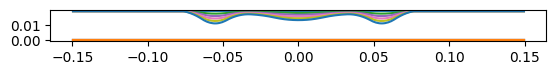

In [9]:
# spline = jnp.array([0.86181835, 0.10249491, 0.67961064, 0.68944927])
# spline = jnp.array([0.86181835, 0.10249491, 0.67961064, 0.68944927, 0.39092797])
spline = jnp.array([0.86181835, 0.10249491, 0.67961064, 0.68944927, 0.39092797, 0.73175392])
wood = t.Wood.make_E_nu(E = 29.100e9, nu = 8.20, rho = 1059)
# wood = t.Wood.make_E_nu(E = 26.100e9, nu = 8.49, rho = 1059)
# wood = t.Wood.make_E_nu(E = 29.100e9, nu = 8.49, rho = 1059)
bar = make_bar(59, width = 0.038, depth = 0.019, elements = 300)
print(bar)


cuts = jnp.arange(0.0, 1.1, 0.2)
predict_freqs = []

for i in cuts:
    # xi = jnp.arange(1, len(sol.value) - 1)
    # ii = jnp.minimum(xi * i, 1)

    vv = xylo.cut.spline_scale(spline, i)
    # XXX
    sections = xylo.cut.spline(bar, vv) # , max_spread=1.0)
    sections.plot() # (to_scale = False)

    swp = xs.sweep(wood, bar, sections, t.sweep_default)
    print(i, swp.harmonics, swp.harmonics / swp.harmonics[0])

    predict_freqs.append(swp.harmonics[0])

predict_freqs = jnp.array(predict_freqs)

In [10]:
measure_freqs = jnp.array([1081.6, 999.6, 928.8, 871.2, 771.4, 688.6])
# [1081.6 1585.8 2677.8 3527.4]
# [ 999.6 1858.6 2535.6 3509.6]
# [ 928.8 1447.2 2410.4]
# [ 871.2 1346.  1801.  2276.4]
# [ 771.4 ]
# [ 688.6 1690.4 2100.4 3531. ]

In [11]:
error_freqs = predict_freqs - measure_freqs

In [12]:
error_freqs

Array([-1.78717084e-02,  1.51519005e+01,  1.96411582e+01,  1.06960544e+01,
        4.27678716e+01,  5.54068240e+01], dtype=float64)

[36.37451506 11.45820819  4.33465571]
[ 4.33465571  8.08127795 14.7378614  24.30440605 36.7809119  52.16737896] [-1.78717084e-02  1.51519005e+01  1.96411582e+01  1.06960544e+01
  4.27678716e+01  5.54068240e+01]


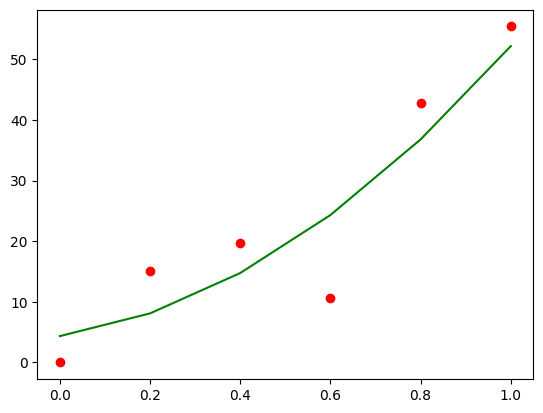

In [13]:
# plt.plot(cuts, measure_freqs, color = 'blue')
# plt.plot(cuts, predict_freqs, color = 'green')

rhs = error_freqs # / predict_freqs
plt.scatter(cuts, rhs, color = 'red')

p = jnp.polyfit(cuts[0:-1], rhs[0:-1], 2)
print(p)
# plt.plot(cuts, (cuts ** 2) * p[0] + (cuts ** 1) * p[1] + p[2], color = 'purple')
vals = jnp.polyval(p, cuts)
plt.plot(cuts, vals, color = 'green')
print(vals, rhs)

[-8.48654731e-07 -1.08104985e-03  2.15034035e+00]
[[ 1.08158213e+03 -1.16770488e-02]
 [ 1.01475190e+03  1.79464997e-01]
 [ 9.48441158e+02  3.61628758e-01]
 [ 8.81896054e+02  5.36933462e-01]
 [ 8.14167872e+02  7.07637100e-01]
 [ 7.44006824e+02  8.76262315e-01]]


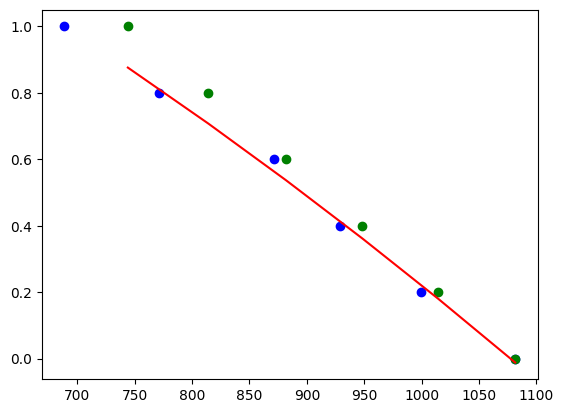

In [14]:
plt.scatter(measure_freqs, cuts, color = 'blue')
plt.scatter(predict_freqs, cuts, color = 'green')

lhs = measure_freqs
rhs = cuts

p = jnp.polyfit(lhs[0:-1], rhs[0:-1], 2)
print(p)
# plt.plot(cuts, (cuts ** 2) * p[0] + (cuts ** 1) * p[1] + p[2], color = 'purple')
vals = jnp.polyval(p, predict_freqs)
plt.plot(predict_freqs, vals, color = 'red')
print(jnp.stack([predict_freqs, vals]).T)

[2.58960804e-04 4.06250624e-01 3.42994699e+02]


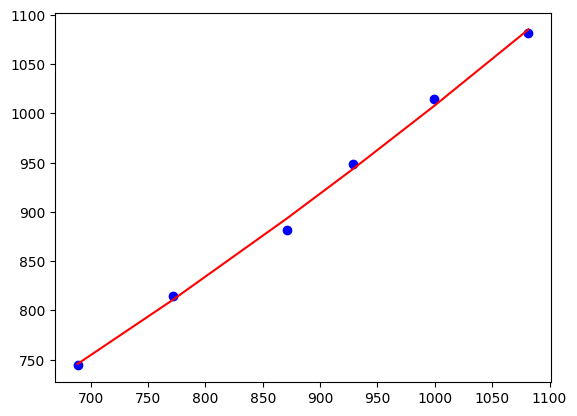

In [19]:
plt.scatter(measure_freqs, predict_freqs, color = 'blue')

lhs = measure_freqs
rhs = predict_freqs

p = jnp.polyfit(lhs[0:-1], rhs[0:-1], 2)
print(p)
# plt.plot(cuts, (cuts ** 2) * p[0] + (cuts ** 1) * p[1] + p[2], color = 'purple')
vals = jnp.polyval(p, measure_freqs)
plt.plot(lhs, vals, color = 'red')

In [16]:
def loss(woodX, bar, measurements, spline):
    wood = t.Wood.make_E_nu(E = woodX[0], nu = woodX[1], rho = 1059)

    cuts = jnp.arange(0.0, 1.1, 0.2)
    def go(i):
        vv = xylo.cut.spline_scale(spline, i)
        sections = xylo.cut.spline(bar, vv) # , max_spread=1.0)
        swp = xs.sweep(wood, bar, sections, t.sweep_default)
        jax.debug.print("{i} swp {swp}", i=i, swp=swp.harmonics)
        return swp.harmonics[0]

    freqs = jax.vmap(go)(cuts)
    print(freqs)
    return jnp.mean((freqs - measurements) ** 2)


In [17]:
bar = make_bar(59, width = 0.038, depth = 0.019, elements = 300)
woodX = jnp.array([29.1e9, 8.5])
iters = 100
lrate = 0.001

In [18]:
# for _ in range(iters):
w = grad(woodX, bar, measure_freqs, spline)
print(w)

NameError: name 'grad' is not defined